# Outline experiment final assignment

## Presentation of a story

1. Multiple pages of text on screen. Participants can view a page as long as they want, and press the spacebar to proceed to the next page.
2. Text and background will be in grayscale color. It will be selected at random what the contrast between text and background will be.
3. Contrast between text and background per participant will have to be stored.
4. Reading time per page is collected.
5. filenames have to be dependend on participant name

## Questionnaires about reading experiences

1. Story World Absorption Scale (SWAS) will be presented.
2. Participants will have to answer each question on a scale of 1-7. Other responses result in an NA
3. Output from the questionnaires will be collected.

## Analysis
1. Calculate mean SWAS
2. Calculate total reading time per participant
3. Calculate correlation between SWAS & total reading time
4. Analyze whether means for SWAS and total reading time are related to level of contrast between text and background.

## Visualization
1. Visualize correlation SWAS & total reading time
2. Visualize Mean SWAS per level of contrast
3. Visualize total reading time per level of contrast

# Step 1
## Presentation of a story

1. Multiple pages of text on screen. Participants can view a page as long as they want, and press the spacebar to proceed to the next page.
2. Text and background will be in grayscale color. It will be selected at random what the contrast between text and background will be.
3. Contrast between text and background per participant will have to be stored.
4. Reading time per page is collected.
5. filenames have to be dependend on participant name

In [63]:
import subprocess as sp
sp.run(['python', 'storypresentation.py'])

#this doesn't work anymore, step 1 and step 2 are combined in step 3 to create a smooth experiment consisting of two 
#parts! This is now a module called in main.py. To run this, simply run main.py (under Step 3)

CompletedProcess(args=['python', 'storypresentation.py'], returncode=0)

# Step 2
## Questionnaires about reading experiences
1. Story World Absorption Scale (SWAS) will be presented.
2. Participants will have to answer each question on a scale of 1-7. Other responses result in an NA
3. Output from the questionnaires will be collected.

In [69]:
import subprocess as sp
sp.run(['python', 'questionnaires.py'])

#this doesn't work anymore, step 1 and step 2 are combined in step 3 to create a smooth experiment consisting of two 
#parts! This is now a module called in main.py. To run this, simply run main.py (under Step 3)

CompletedProcess(args=['python', 'questionnaires.py'], returncode=0)

# Step 3
## both experiment and questionnaires in one main script. 
### In this script I want to:
1. open window for experiment
2. ask participant number
3. run experiment
4. run questionnaires
5. close window

### NB: these steps can than be removed from the sub-scripts! Sub-script will be imported as modules.

In [10]:
import subprocess as sp
sp.run(['python', 'main.py'])

CompletedProcess(args=['python', 'main.py'], returncode=0)

# Step 4
## Analysis
1. Calculate mean SWAS
2. Calculate total reading time per participant
3. Calculate correlation between SWAS & total reading time
4. Analyze whether means for SWAS and total reading time are related to level of contrast between text and background.

In [98]:
#substeps 1 & 2

import csv
import glob
import re

quest_files = glob.glob("*_questionnaire.tsv")
read_files = glob.glob("*_readingtime.tsv")
contrast_files = glob.glob("*_colorvalues.csv")

with open("dataquest.csv","w") as outputfile:
    ppn = []
    questscore = []
    readingtime = []
    contrast = []
    #Get Mean Quest Score and Subject number
    for file in quest_files:
        ppn.append(''.join(re.findall("\d+",file)))
        with open(file,"r") as quest:
            content = csv.DictReader(quest,delimiter = "\t")
            answer = []
            for row in content:
                if row["Answer"] != "NA":
                    answer.append(int(row["Answer"]))
                else:
                    continue
        questscore.append(sum(answer)/len(answer))
    
    #Get Mean Reading Time
    for file in read_files:
        with open(file,"r") as readtime:
            content = csv.DictReader(readtime, delimiter = "\t")
            time = []
            for row in content:
                time.append(float(row["Time"]))
        readingtime.append(sum(time)/len(time))
    
    #Get Contrast
    for file in contrast_files:
        with open(file,"r") as contrastfile:
            content = csv.reader(contrastfile)
            for row in content:
                if "backgroundcolor" in re.findall("\w+",row[0]):
                    background = "".join(re.findall("\[(.{1,2}\.\d+)",row[0]))
                elif "textcolor" in re.findall("\w+",row[0]):
                    text = "".join(re.findall("\[(.{1,2}\.\d+)",row[0]))
            contrast.append(abs(float(background) - float(text)))
    
    
    #Write to output CSV
    writer = csv.writer(outputfile)
    
    writer.writerow(["ppn","questscore","readingtime","contrast"])
    
    for i in range(len(ppn)):
        writer.writerow([ppn[i],questscore[i],readingtime[i],contrast[i]])

[4.0, 5.0, 4.0, 5.5]
['1', '2', '4', '7']
[10.401055152620813, 16.05005420727076, 1.589780374448992, 7.719013694982436]
[0.5782776597901396, 0.08147144544006202, 1.412553349777867, 0.3303511710373612]


In [104]:
#substep 3: correlation SWAS & Readingtime

import pandas as pd

data = pd.read_csv("dataquest.csv")
print(data.head())

data["questscore"].corr(data["readingtime"], method = "pearson")

#correlation between SWAS & Readingtime = 0.390641082174172

   ppn  questscore  readingtime  contrast
0    1         4.0    10.401055  0.578278
1    2         5.0    16.050054  0.081471
2    4         4.0     1.589780  1.412553
3    7         5.5     7.719014  0.330351


0.390641082174172

In [106]:
#substep 4: Analyze whether means for SWAS subscales and total reading time is related to level of contrast between
#text and background

# first questscore ~ contrast

import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

# import dataset
data = pd.read_csv('dataquest.csv')

X = data[['contrast']]
y = data['questscore']

model = linear_model.LinearRegression()  # instantiate a linear model
model.fit(X, y)  # fit the model betas
y_predicted = model.predict(X)  # predict y from X
r2 = r2_score(y, y_predicted)  # calculate model R-squared
print(f'R-squared is {r2}')

R-squared is 0.5055043751235185


In [107]:
# second readingtime ~ contrast

import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

# import dataset
data = pd.read_csv('dataquest.csv')

X = data[['contrast']]
y = data['readingtime']

model = linear_model.LinearRegression()  # instantiate a linear model
model.fit(X, y)  # fit the model betas
y_predicted = model.predict(X)  # predict y from X
r2 = r2_score(y, y_predicted)  # calculate model R-squared
print(f'R-squared is {r2}')

R-squared is 0.8081111725221025


# Step 5
## Visualization
1. Visualize correlation SWAS & total reading time
2. Visualize Mean SWAS per level of contrast
3. Visualize total reading time per level of contrast

In [108]:
import seaborn as sns  # convention is to import seaborn under the name sns, for unclear reasons

# some magic that will make this notebook display our plots inline, don't worry about this for now
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

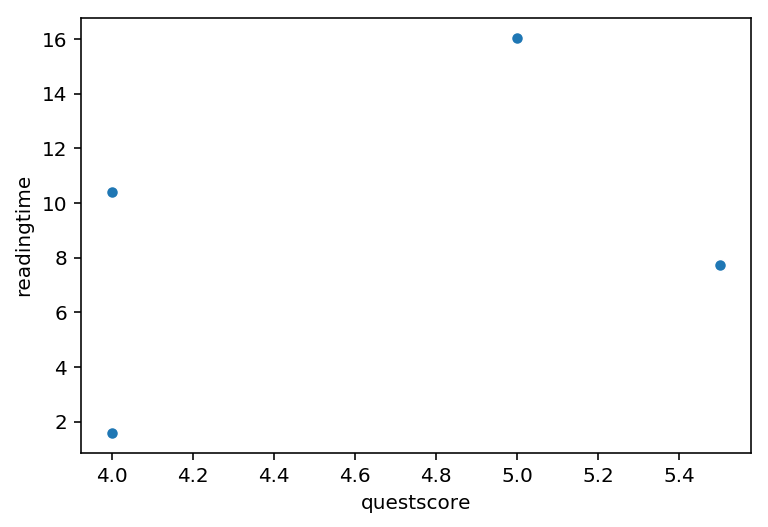

In [113]:
#scatterplot questscore & readingtime
sns.scatterplot("questscore","readingtime", data = data)

C:\Users\Marloes Mak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


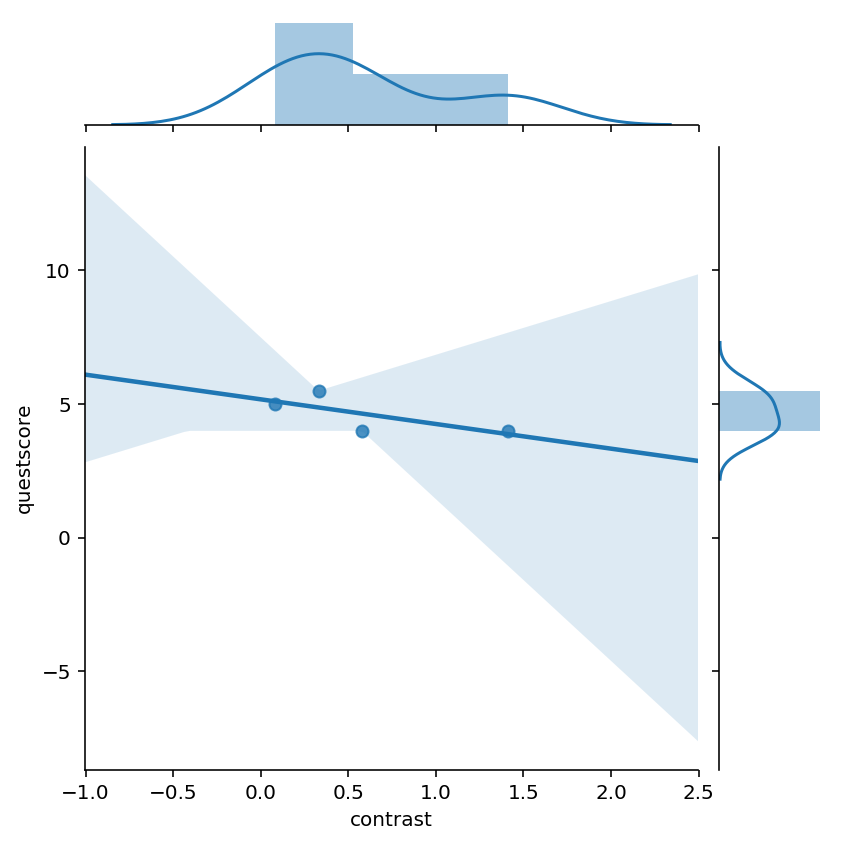

In [110]:
#regressionplot of contrast & questscore

sns.jointplot("contrast", "questscore", data=data, kind="reg")

C:\Users\Marloes Mak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


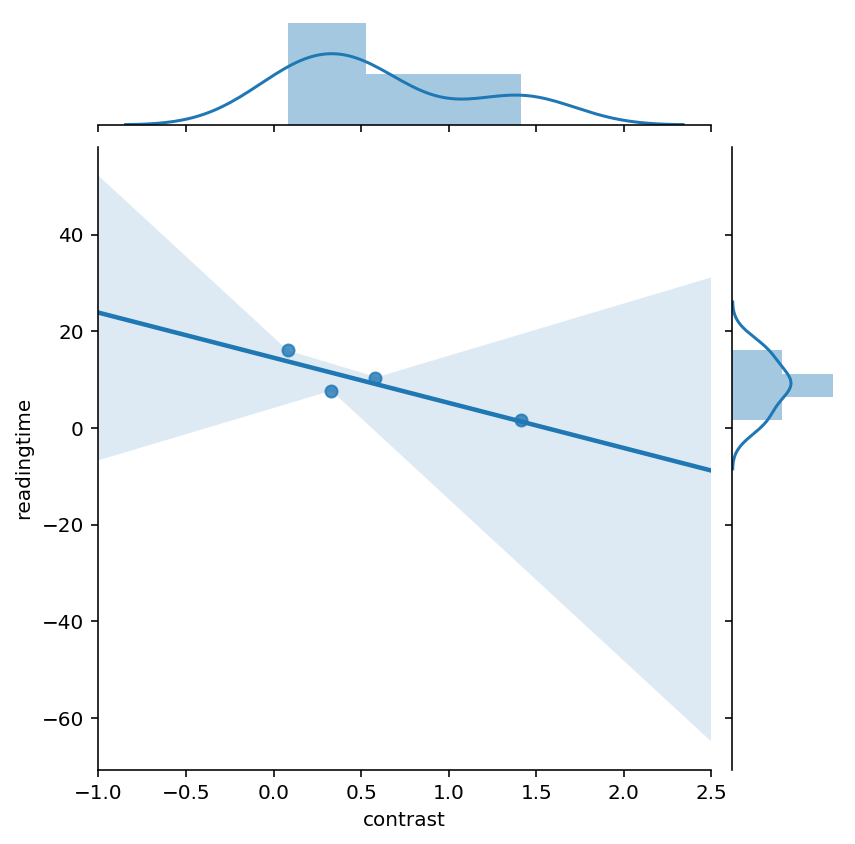

In [111]:
#regressionplot of contrast and readingtime
sns.jointplot("contrast", "readingtime", data=data, kind="reg")